<a href="https://colab.research.google.com/github/LuisMedinaBravo/Minor-Machine-Learning/blob/main/PinguinosClasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parte 1:**

Clasificación KNN

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [212]:
# Carga de datos

#url='https://github.com/LuisMedinaBravo/Minor-Machine-Learning/blob/main/penguins_lter.csv'


#dataframe = pd.read_csv('https://github.com/LuisMedinaBravo/Minor-Machine-Learning/blob/main/penguins_lter.csv',sep=';',names=None)

dataframe = sb.load_dataset("penguins")
dataframe
#dataframe.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [226]:
Adelie=dataframe[dataframe["species"]=="Adelie"]
Gentoo=dataframe[dataframe["species"]=="Gentoo"]
Chinstrap=dataframe[dataframe["species"]=="Chinstrap"]
Adelie, Gentoo, Chinstrap

(    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 0    Adelie  Torgersen            39.1           18.7              181.0   
 1    Adelie  Torgersen            39.5           17.4              186.0   
 2    Adelie  Torgersen            40.3           18.0              195.0   
 3    Adelie  Torgersen             NaN            NaN                NaN   
 4    Adelie  Torgersen            36.7           19.3              193.0   
 ..      ...        ...             ...            ...                ...   
 147  Adelie      Dream            36.6           18.4              184.0   
 148  Adelie      Dream            36.0           17.8              195.0   
 149  Adelie      Dream            37.8           18.1              193.0   
 150  Adelie      Dream            36.0           17.1              187.0   
 151  Adelie      Dream            41.5           18.5              201.0   
 
      body_mass_g     sex  
 0         3750.0    Male  
 1         3800.0 

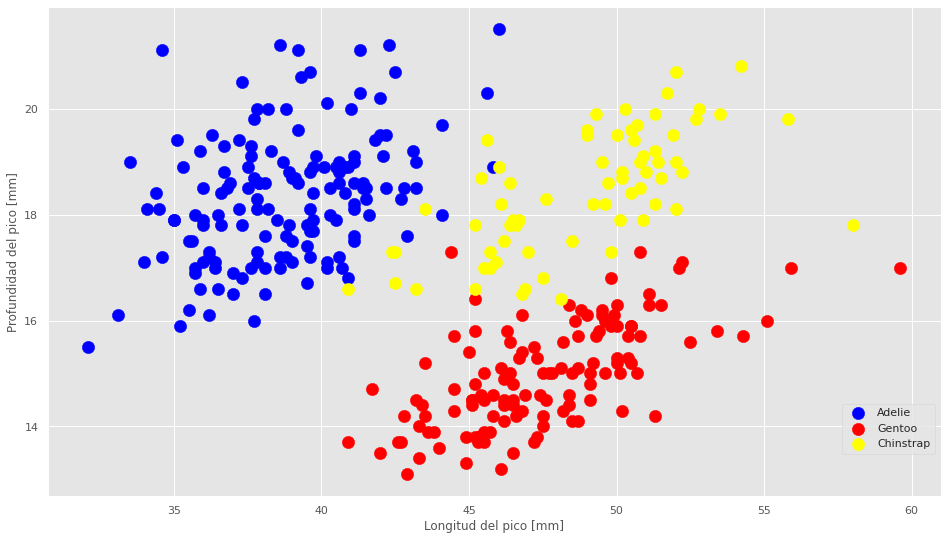

In [309]:
plt.scatter(Adelie["bill_length_mm"],Adelie["bill_depth_mm"],color="blue",s=150,label="Adelie")

plt.scatter(Gentoo["bill_length_mm"],Gentoo["bill_depth_mm"],color="red",s=150,label="Gentoo")

plt.scatter(Chinstrap["bill_length_mm"],Chinstrap["bill_depth_mm"],color="yellow",s=150,label="Chinstrap")

plt.xlabel("Longitud del pico [mm]")
plt.ylabel("Profundidad del pico [mm]")
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()


In [259]:
from sklearn import preprocessing

datos=dataframe[["bill_length_mm","bill_depth_mm"]]
clase=dataframe["species"]

dataframe = dataframe.dropna()

escalador=preprocessing.MinMaxScaler()
datos=escalador.fit_transform(datos)
datos


array([[0.25454545, 0.66666667],
       [0.26909091, 0.51190476],
       [0.29818182, 0.58333333],
       [0.16727273, 0.73809524],
       [0.26181818, 0.89285714],
       [0.24727273, 0.55952381],
       [0.25818182, 0.77380952],
       [0.32727273, 0.53571429],
       [0.23636364, 0.96428571],
       [0.09090909, 0.95238095],
       [0.16363636, 0.55952381],
       [0.24      , 0.70238095],
       [0.37818182, 0.9047619 ],
       [0.08363636, 0.63095238],
       [0.50545455, 1.        ],
       [0.20727273, 0.61904762],
       [0.20363636, 0.66666667],
       [0.13818182, 0.72619048],
       [0.22181818, 0.5952381 ],
       [0.24363636, 0.48809524],
       [0.11636364, 0.69047619],
       [0.30909091, 0.6547619 ],
       [0.30545455, 0.57142857],
       [0.21090909, 0.6547619 ],
       [0.30545455, 0.69047619],
       [0.26909091, 0.42857143],
       [0.18545455, 0.5952381 ],
       [0.26909091, 0.55952381],
       [0.32      , 0.69047619],
       [0.15636364, 0.46428571],
       [0.

In [317]:
#En este caso aproximé la raíz de 344 (total de datos) para la cantidad de vecinos
#Raíz de 344 = 18.54 -> 19

clasificador=KNeighborsClassifier(n_neighbors=19)
clasificador.fit(datos,clase)

KNeighborsClassifier(n_neighbors=19)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Clase  ['Chinstrap']
Probabilidades por clase  [[0.         0.73684211 0.26315789]]


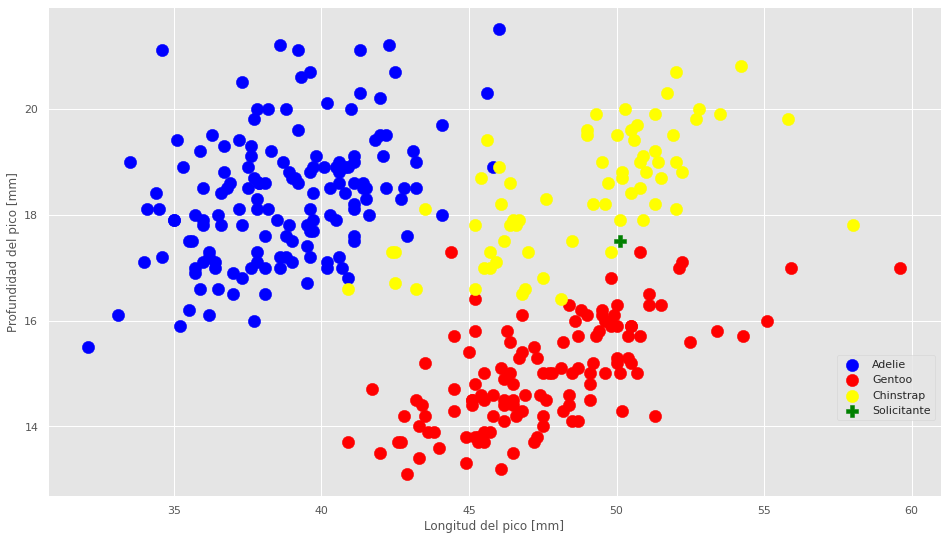

In [321]:
#NUEVO PINGUINO SOLICITANTE

longitud_pico=50.1
profundidad_pico=17.5

solicitante=escalador.transform([[longitud_pico, profundidad_pico]])
print("Clase ",clasificador.predict(solicitante))
print("Probabilidades por clase ",clasificador.predict_proba(solicitante))

plt.scatter(Adelie["bill_length_mm"],Adelie["bill_depth_mm"],color="blue",s=150,label="Adelie")

plt.scatter(Gentoo["bill_length_mm"],Gentoo["bill_depth_mm"],color="red",s=150,label="Gentoo")

plt.scatter(Chinstrap["bill_length_mm"],Chinstrap["bill_depth_mm"],color="yellow",s=150,label="Chinstrap")

plt.scatter(longitud_pico,profundidad_pico,marker="P",s=150,color="green",label="Solicitante")

plt.xlabel("Longitud del pico [mm]")
plt.ylabel("Profundidad del pico [mm]")
plt.legend(bbox_to_anchor=(1,0.3))
plt.show()

**Parte 2:**

Clasificación Cruzada y promedio de sus certezas

In [322]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

folds=10
suma_errores=0

df=pd.DataFrame(dataframe)
X=df["bill_length_mm"] #largo del pico
y=df["bill_depth_mm"] #profundidad del pico

kf=KFold(n_splits=folds, shuffle=True, random_state=2)

#for valores_x,valores_y in kf.split(X):
 # print(valores_x,valores_y)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


regr=linear_model.LinearRegression()

for entrenamiento_indice, prueba_indice in kf.split(X):

  print("\nEntrenamiento: ",entrenamiento_indice,"\n\nPrueba: ",prueba_indice)
  X_entrenamiento, X_prueba = X.iloc[entrenamiento_indice],X.iloc[prueba_indice]
  y_entrenamiento, y_prueba = y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
  X_entrenamiento= X_entrenamiento.values.reshape([X_entrenamiento.values.shape[0],1])
  X_prueba=X_prueba.values.reshape([X_prueba.values.shape[0],1])
  regr.fit(X_entrenamiento,y_entrenamiento)
  y_pred=regr.predict(X_prueba)
  print(y_pred)
  print("\nError: ", mean_squared_error(y_prueba,y_pred))
  suma_errores=suma_errores+mean_squared_error(y_prueba,y_pred)
  #print("El valor de r2: ", r2_score(y_prueba,y_pred))

print("\nEl promedio de las",folds,"certezas es:",suma_errores/folds)







Entrenamiento:  [  0   1   2   4   5   6   8   9  10  11  12  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  67  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  85  86  87  88  90  92  93  95  96  97  99 100 101 102
 103 105 106 107 108 109 110 111 112 113 114 115 116 117 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 143 145 147 148 149 150 151 152 154 155 156 157 158 159 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 218 219 220 221 222
 224 225 226 227 228 229 230 231 233 234 235 236 237 238 239 240 241 242
 243 245 246 247 248 249 250 251 252 254 255 256 257 258 259 260 261 262
 263 265 266 267 268 269 270 271 2